# Noncontributing forces

This notebook shows how to compute the noncontributing forces at the joint located at Point, $P_{ab}$, by introducing auxiliary speeds.

# Imports

In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting(use_latex=True, pretty_print=False)

# Generalized coordinates

In [2]:
q1, q2, q3 = me.dynamicsymbols('q1, q2, q3')

# Generalized speeds

In [3]:
u1, u2, u3 = me.dynamicsymbols('u1, u2, u3')

# Auxiliary speeds

There is a reaction force at $P_{ab}$ that is made up of two componenets in the $N$ frame. Introduce a fictitious generalized speed that corresponds to the motion aligned with each component of unknown force. $u_4$ will correspond with $f_x$ and $u_5$ with $f_y$.

In [4]:
u4, u5 = me.dynamicsymbols('u4, u5')

# Noncontributing force components

In [5]:
fx, fy = me.dynamicsymbols('f_x, f_y')

# Specified Inputs

In [6]:
F, T = me.dynamicsymbols('F, T')

# Constants

In [7]:
k, c, ma, mb, mc, IB_bo, l, kT, g = sm.symbols('k, c, m_a, m_b, m_c, I_{B_bo}, l, k_T, g')
IB_bo

# Reference Frames

In [8]:
N = me.ReferenceFrame('N')

In [9]:
B = N.orientnew('B', 'Axis', (q2, N.z))

In [10]:
C = B.orientnew('C', 'Axis', (q3, N.z))

# Kinematic Differential Equations

$$
u_i = \dot{q}_i \\
0 = u_i - \dot{q}_i
$$


In [11]:
kdes = [u1 - q1.diff(),
        u2 - q2.diff(),
        u3 - q3.diff()]
kdes

# Angular Velocities

In [12]:
B.set_ang_vel(N, u2 * N.z)

In [13]:
C.set_ang_vel(B, u3 * N.z)

# Points

In [14]:
O = me.Point('O')

In [15]:
Pab = O.locatenew('P_{ab}', q1 * N.x)

In [16]:
Bo = Pab.locatenew('B_o', - 2 * l / 3 * B.y)

In [17]:
Pbc = Pab.locatenew('P_{bc}', -l * B.y)

In [18]:
Pc = Pbc.locatenew('P_c', -l * C.y)

In [19]:
Pc.pos_from(O)

# Linear Velocities

When calculating velocities be sure to include the velocity components due to the auxiliary speeds.

In [20]:
Pab.set_vel(N, u1 * N.x + u4 * N.x + u5 * N.y)

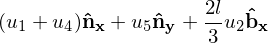

In [21]:
Bo.v2pt_theory(Pab, N, B)

In [22]:
Pbc.v2pt_theory(Pab, N, B)

In [23]:
Pc.v2pt_theory(Pbc, N, C)

# Partial Velocities

There will now be two additional partial velocities, one for each of the auxilary speeds.

In [24]:
Pab.vel(N).diff(u1, N)

In [25]:
Pab.partial_velocity(N, u1)

In [26]:
Pab.partial_velocity(N, u1, u2, u3, u4, u5)

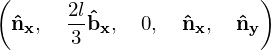

In [27]:
Bo.partial_velocity(N, u1, u2, u3, u4, u5)

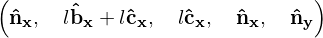

In [28]:
Pc.partial_velocity(N, u1, u2, u3, u4, u5)

In [29]:
B.partial_velocity(N, u1, u2, u3, u4, u5)

In [30]:
[B.ang_vel_in(N).diff(ur, N) for ur in [u1, u2, u3, u4, u5]]

# Angular Accelerations

In [31]:
alpha_B_N = B.ang_acc_in(N)
alpha_B_N

In [32]:
a_Pab_N = Pab.acc(N)
a_Pab_N

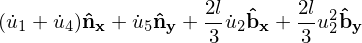

In [33]:
a_Bo_N = Bo.acc(N)
a_Bo_N

In [34]:
a_Pc_N = Pc.acc(N)
a_Pc_N

# Loads (forces and torques)

These new loads should include the unknown forces. Careful with the sign here. $f_x,f_y$ should correspond to the force the point attached to the compound pendulum would experience if the motion due to $u_4,u_5$ occured (based on the fictious particle on the pendulum).

In [35]:
Rab = (F - k * q1 - c * u1 - fx) * N.x  - fy * N.y
Rab

In [36]:
Rbo = -(mb * g) * N.y
Rbo

In [37]:
Rc = -(mc * g) * N.y
Rc

In [38]:
TB = (T + kT * q3) * N.z
TB

# Mass and Inertia

In [39]:
IB = me.inertia(B, 0, 0, IB_bo)
IB

In [40]:
ma, mc

# Generalized Active Forces

Now calculate 5 GAFs, one for each actual generalized speed and one each for the 2 auxiliary speeds

In [41]:
u = [u1, u2, u3, u4, u5]

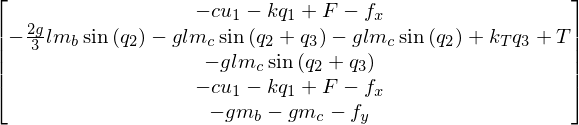

In [42]:
Fr = []

for ur in u:
    Fr.append(Pab.partial_velocity(N, ur).dot(Rab) +
              Pc.partial_velocity(N, ur).dot(Rc) +
              Bo.partial_velocity(N, ur).dot(Rbo) +
              B.partial_velocity(N, ur).dot(TB)
             )
    
Fr = sm.trigsimp(sm.Matrix(Fr))
Fr

# Generalized Inertia Forces

There will also be 5 GIFs.

In [43]:
Frstar = []

for ur in u:
    Frstar.append(Pab.partial_velocity(N, ur).dot(-ma * a_Pab_N) +
                  Pc.partial_velocity(N, ur).dot(-mc * a_Pc_N) +
                  Bo.partial_velocity(N, ur).dot(-mb * a_Bo_N) +
                  B.partial_velocity(N, ur).dot(-alpha_B_N.dot(IB) + B.ang_vel_in(N).cross(IB.dot(B.ang_vel_in(N)))))
    
Frstar = sm.trigsimp(sm.Matrix(Frstar))

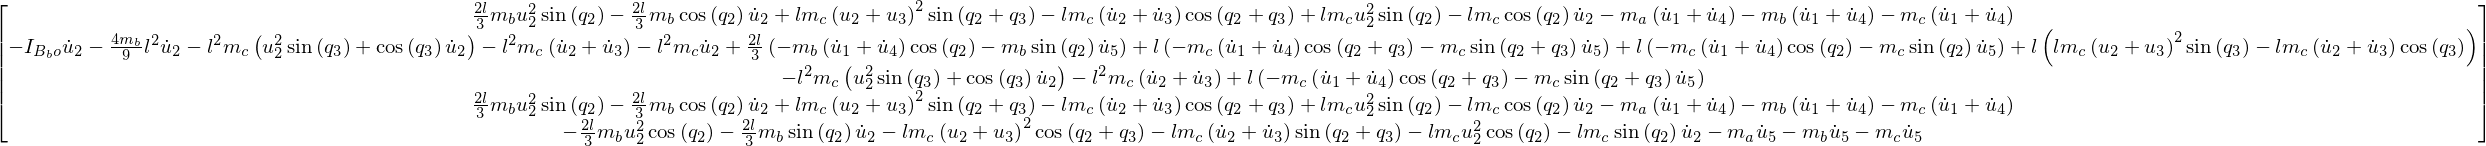

In [44]:
Frstar

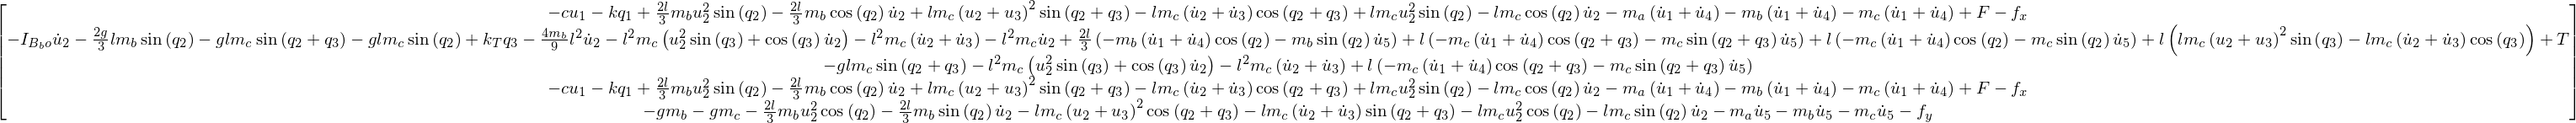

In [45]:
zero = Fr + Frstar
zero

No $\dot{q}$'s!

In [46]:
me.find_dynamicsymbols(zero)

In [47]:
zero.free_symbols

# Calculate the noncontributing loads

The last two equations of $F_r + F_r^* = $ can be used to solve for the unknown forces. To do this set the fictious auxiliary speeds, $u_4,u_5$, to zero and then solve the two equations for the two unknown force components.

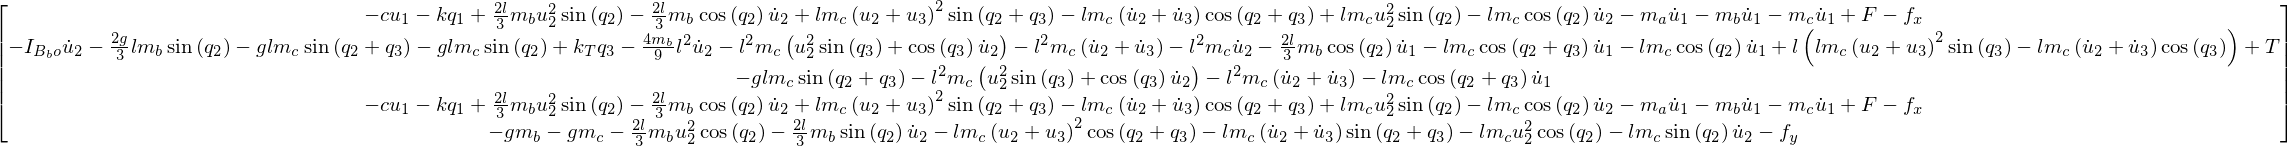

In [48]:
zero = zero.subs({u4.diff(): 0, u5.diff(): 0}).subs({u4: 0, u5: 0})
zero

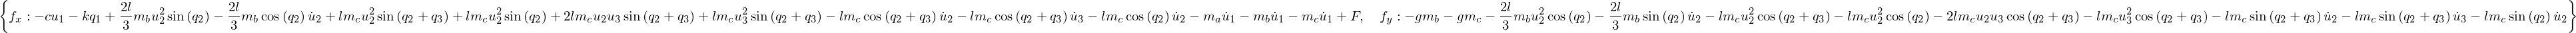

In [49]:
sm.solve(zero[-2:, 0], fx, fy)

Above are the expressions for the force components as a function of time and all of the actual generalized speeds.

The actual equations of motion can be recovered by substituting zero for the force components.

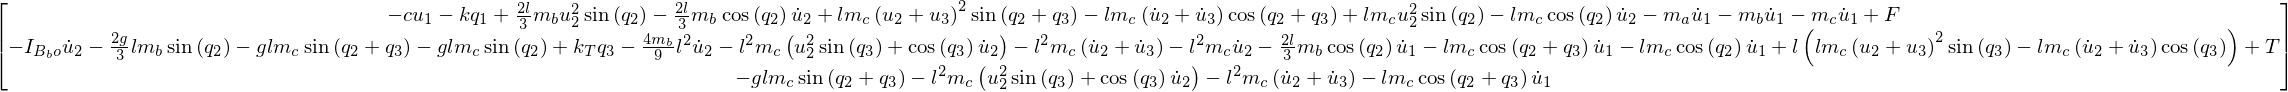

In [50]:
zero[:3, 0].subs({fx: 0, fy: 0})

# Using KanesMethod with auxiliary speeds

In [51]:
slider = me.Particle('slider', Pab, ma)
bob = me.Particle('bob', Pc, mc)

In [52]:
pend = me.RigidBody('pend', Bo, B, mb, (IB, Bo))

In [53]:
bodies = [slider, bob, pend]

In [54]:
loads = [(Pab, Rab),
         (Pc, Rc),
         (Bo, Rbo),
         (B, TB)]

The same equations as found above are returned if you provide an iterable of auxiliary speeds.

In [55]:
kane = me.KanesMethod(N, [q1, q2, q3], [u1, u2, u3], kd_eqs=kdes, u_auxiliary=[u4, u5])

In [56]:
Fr, Frstar = kane.kanes_equations(bodies, loads)

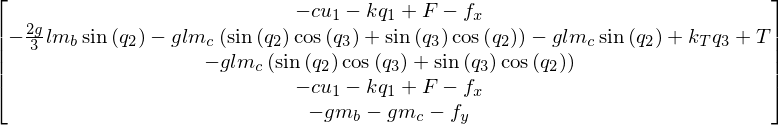

In [57]:
Fr

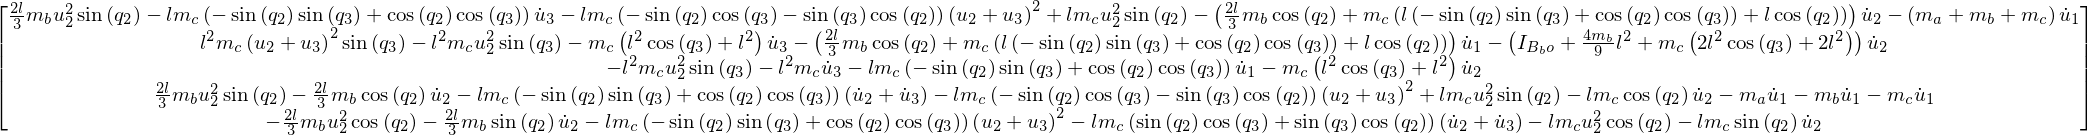

In [58]:
Frstar